# Plots for GC-bias analysis

In [1]:
import os
import numpy as np
from six.moves import cPickle
import pandas as pd
import logomaker
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from residualbind import ResidualBind, GlobalImportance
import helper, explain


Using TensorFlow backend.


In [2]:
def mutagenesis(model, X, class_index=0, layer=-2):

    def generate_mutagenesis(X):
        L,A = X.shape 

        X_mut = []
        for l in range(L):
            for a in range(A):
                X_new = np.copy(X)
                X_new[l,:] = 0
                X_new[l,a] = 1
                X_mut.append(X_new)
        return np.array(X_mut)

    N, L, A = X.shape 
    intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[layer].output)

    attr_score = []
    for x in X:

        # get baseline wildtype score
        wt_score = intermediate.predict(np.expand_dims(x, axis=0))[:, class_index]

        # generate mutagenized sequences
        x_mut = generate_mutagenesis(x)
        
        # get predictions of mutagenized sequences
        predictions = intermediate.predict(x_mut)[:,class_index]

        # reshape mutagenesis predictiosn
        mut_score = np.zeros((L,A))
        k = 0
        for l in range(L):
            for a in range(A):
                mut_score[l,a] = predictions[k]
                k += 1
                
        attr_score.append(mut_score - wt_score)
    return np.array(attr_score)

# Plot mutagenesis maps for a few different experiments

In [3]:
normalization = 'log_norm'   # 'log_norm' or 'clip_norm'
ss_type = 'seq'                  # 'seq', 'pu', or 'struct'
data_path = '../data/RNAcompete_2013/rnacompete2013.h5'
results_path = os.path.join('../results', 'rnacompete_2013')
save_path = os.path.join(results_path, normalization+'_'+ss_type)
plot_path = helper.make_directory(save_path, 'FINAL')
alphabet = 'ACGU'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
  Loading model from: ../results/rnacompete_2013/log_norm_seq/RNCMPT00112_weights.hdf5


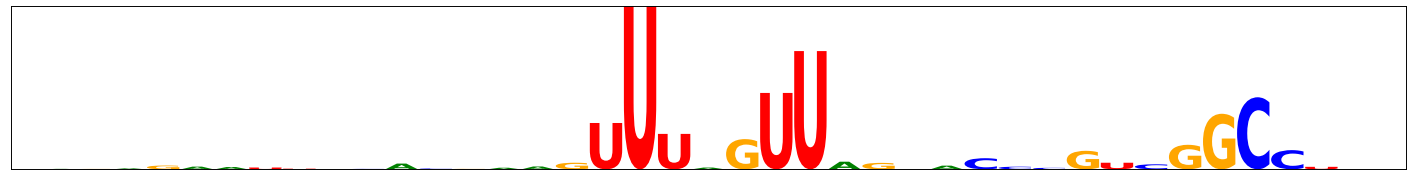

In [4]:
experiment = 'RNCMPT00112'
rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

index = 117851# 106048 #117851

X = np.expand_dims(test['inputs'][index], axis=0)
attr_map = explain.mutagenesis(model.model, X, class_index=0, layer=-1)
scores = np.sum(attr_map**2, axis=2, keepdims=True)*X

N, L, A = X.shape
counts_df = pd.DataFrame(data=0.0, columns=list('ACGU'), index=list(range(L)))
for a in range(A):
    for l in range(L):
        counts_df.iloc[l,a] = scores[0,l,a]

fig = plt.figure(figsize=(25,3))
ax = plt.subplot(1,1,1)
logomaker.Logo(counts_df, ax=ax)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
ax2 = ax.twinx()
#plt.ylabel(np.round(pr_score[k],4), fontsize=16)
plt.yticks([])
outfile = os.path.join(plot_path, experiment+'_'+str(index)+'_mutagenesis_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



  Loading model from: ../results/rnacompete_2013/log_norm_seq/RNCMPT00131_weights.hdf5


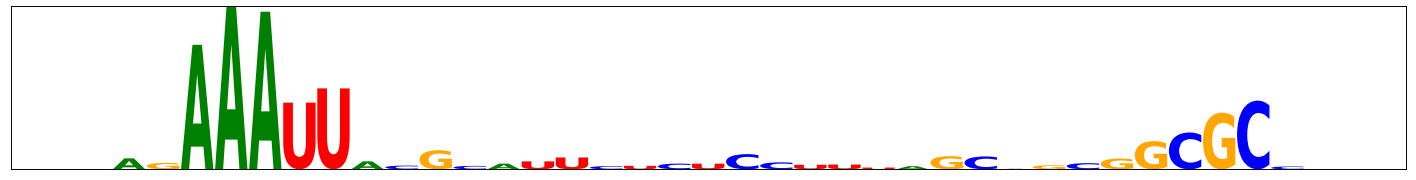

In [62]:
experiment = 'RNCMPT00131'
rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

index = 30883

X = np.expand_dims(test['inputs'][index], axis=0)
attr_map = explain.mutagenesis(model.model, X, class_index=0, layer=-1)
scores = np.sum(attr_map**2, axis=2, keepdims=True)*X

N, L, A = X.shape
counts_df = pd.DataFrame(data=0.0, columns=list('ACGU'), index=list(range(L)))
for a in range(A):
    for l in range(L):
        counts_df.iloc[l,a] = scores[0,l,a]

fig = plt.figure(figsize=(25,3))
ax = plt.subplot(1,1,1)
logomaker.Logo(counts_df, ax=ax)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
ax2 = ax.twinx()
#plt.ylabel(np.round(pr_score[k],4), fontsize=16)
plt.yticks([])
outfile = os.path.join(plot_path, experiment+'_'+str(index)+'_mutagenesis_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



  Loading model from: ../results/rnacompete_2013/log_norm_seq/RNCMPT00100_weights.hdf5


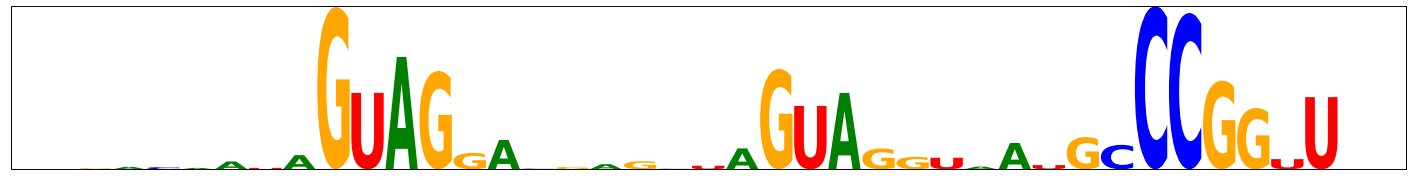

In [40]:
experiment = 'RNCMPT00100'
rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

index = 72318

X = np.expand_dims(test['inputs'][index], axis=0)
attr_map = explain.mutagenesis(model.model, X, class_index=0, layer=-1)
scores = np.sum(attr_map**2, axis=2, keepdims=True)*X

N, L, A = X.shape
counts_df = pd.DataFrame(data=0.0, columns=list('ACGU'), index=list(range(L)))
for a in range(A):
    for l in range(L):
        counts_df.iloc[l,a] = scores[0,l,a]

fig = plt.figure(figsize=(25,3))
ax = plt.subplot(1,1,1)
logomaker.Logo(counts_df, ax=ax)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
ax2 = ax.twinx()
#plt.ylabel(np.round(pr_score[k],4), fontsize=16)
plt.yticks([])
outfile = os.path.join(plot_path, experiment+'_'+str(index)+'_mutagenesis_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



# GIA for individual experiments

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
  Loading model from: ../results/rnacompete_2013/log_norm_seq/RNCMPT00145_weights.hdf5


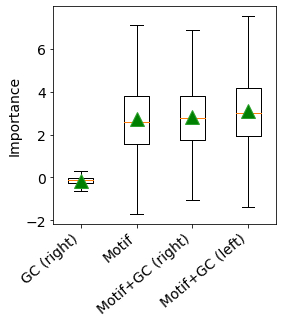

In [4]:
experiment = 'RNCMPT00145'
motif = 'UUGCAC'


rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

# instantiate global importance
gi = GlobalImportance(model, alphabet)
# set null sequence model
null_seq_model = np.mean(np.squeeze(train['inputs']), axis=0)
null_seq_model /= np.sum(null_seq_model, axis=1, keepdims=True)
gi.set_null_model(null_seq_model, num_sim=1000)

motif_position = 17
gc_motif = 'GCGCGC'
gc_positions = [34, 2]
all_scores = gi.gc_bias(motif, motif_position, gc_motif, gc_positions, class_index=0)

fig = plt.figure(figsize=(4,4))
flierprops = dict(marker='^', markerfacecolor='green', markersize=14, linestyle='none')
box = plt.boxplot(all_scores.T, showfliers=False, showmeans=True, meanprops=flierprops);
plt.xticks([1, 2, 3, 4], ['GC (right)', 'Motif', 'Motif+GC (right)', 'Motif+GC (left)'], rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.ylabel('Importance', fontsize=14)
outfile = os.path.join(plot_path, experiment+'_gia_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


In [ ]:
experiment = 'RNCMPT00145'
motif = 'UUGCAC'


rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

# instantiate global importance
gi = GlobalImportance(model, alphabet)
# set null sequence model
null_seq_model = np.mean(np.squeeze(train['inputs']), axis=0)
null_seq_model /= np.sum(null_seq_model, axis=1, keepdims=True)
gi.set_null_model(null_seq_model, num_sim=1000)

motif_position = 17
gc_motif = 'GCGCGC'
gc_positions = [34, 2]
all_scores = gi.gc_bias(motif, motif_position, gc_motif, gc_positions, class_index=0)

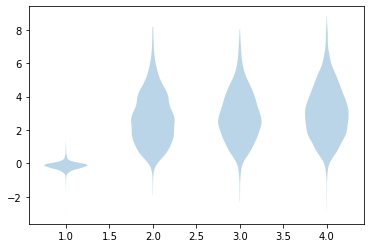

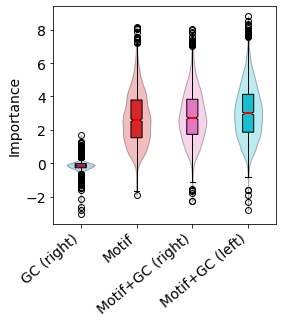

In [10]:
fig = plt.figure(figsize=(4,4))


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='tab10')
test_mean = [0., 0.3, 0.6, 0.9]


vplot = plt.violinplot(all_scores.T, 
                       showextrema=False);

    
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(all_scores.T, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);

plt.xticks([1, 2, 3, 4], ['GC (right)', 'Motif', 'Motif+GC (right)', 'Motif+GC (left)'], rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.ylabel('Importance', fontsize=14)
outfile = os.path.join(plot_path, experiment+'_gia_gcbias2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

  Loading model from: ../results/rnacompete_2013/log_norm_seq/RNCMPT00131_weights.hdf5


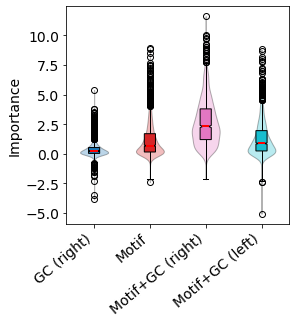

In [11]:
experiment = 'RNCMPT00131'
motif = 'CAAAUU'


rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

# instantiate global importance
gi = GlobalImportance(model, alphabet)
# set null sequence model
null_seq_model = np.mean(np.squeeze(train['inputs']), axis=0)
null_seq_model /= np.sum(null_seq_model, axis=1, keepdims=True)
gi.set_null_model(null_seq_model, num_sim=1000)

motif_position = 17
gc_motif = 'GCGCGC'
gc_positions = [34, 2]
all_scores = gi.gc_bias(motif, motif_position, gc_motif, gc_positions, class_index=0)

"""
fig = plt.figure(figsize=(4,4))
flierprops = dict(marker='^', markerfacecolor='green', markersize=14, linestyle='none')
box = plt.boxplot(all_scores.T, showfliers=False, showmeans=True, meanprops=flierprops);
plt.xticks([1, 2, 3, 4], ['GC (right)', 'Motif', 'Motif+GC (right)', 'Motif+GC (left)'], rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.ylabel('Importance', fontsize=14)
outfile = os.path.join(plot_path, experiment+'_gia_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
"""

fig = plt.figure(figsize=(4,4))


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='tab10')
test_mean = [0., 0.3, 0.6, 0.9]


vplot = plt.violinplot(all_scores.T, 
                       showextrema=False);

    
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(all_scores.T, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);

plt.xticks([1, 2, 3, 4], ['GC (right)', 'Motif', 'Motif+GC (right)', 'Motif+GC (left)'], rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.ylabel('Importance', fontsize=14)
outfile = os.path.join(plot_path, experiment+'_gia_gcbias2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


  Loading model from: ../results/rnacompete_2013/log_norm_seq/RNCMPT00112_weights.hdf5


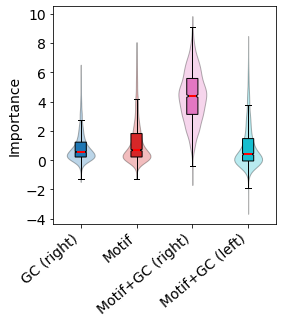

In [13]:
experiment = 'RNCMPT00112'
motif = 'UUAUUU'


rbp_index = helper.find_experiment_index(data_path, experiment)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

# instantiate global importance
gi = GlobalImportance(model, alphabet)
# set null sequence model
null_seq_model = np.mean(np.squeeze(train['inputs']), axis=0)
null_seq_model /= np.sum(null_seq_model, axis=1, keepdims=True)
gi.set_null_model(null_seq_model, num_sim=1000)

motif_position = 17
gc_motif = 'GCGCGC'
gc_positions = [34, 2]
all_scores = gi.gc_bias(motif, motif_position, gc_motif, gc_positions, class_index=0)

"""fig = plt.figure(figsize=(4,4))
flierprops = dict(marker='^', markerfacecolor='green', markersize=14, linestyle='none')
box = plt.boxplot(all_scores.T, showfliers=False, showmeans=True, meanprops=flierprops);
plt.xticks([1, 2, 3, 4], ['GC (right)', 'Motif', 'Motif+GC (right)', 'Motif+GC (left)'], rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.ylabel('Importance', fontsize=14)
outfile = os.path.join(plot_path, experiment+'_gia_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
"""

fig = plt.figure(figsize=(4,4))


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='tab10')
test_mean = [0., 0.3, 0.6, 0.9]


vplot = plt.violinplot(all_scores.T, 
                       showextrema=False);

    
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(all_scores.T, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops,
                    showfliers=False
                   );

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);

plt.xticks([1, 2, 3, 4], ['GC (right)', 'Motif', 'Motif+GC (right)', 'Motif+GC (left)'], rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.ylabel('Importance', fontsize=14)
outfile = os.path.join(plot_path, experiment+'_gia_gcbias2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

# GC-bias GIA summary across RNAcompete dataset

In [44]:
dirpath = '../results/rnacompete_2013/log_norm_seq/plots/results.pickle'
with open(dirpath, 'rb') as f:
    multiple_sites_all = cPickle.load(f)
    gcbias_all = cPickle.load(f)
    hairpin_all = cPickle.load(f)

In [45]:
scores = []
for x in gcbias_all:
    scores.append(x[0])
scores = np.array(scores)

right = (scores[:,1] - scores[:,2])/scores[:,1]
left = (scores[:,1] - scores[:,3])/scores[:,1]

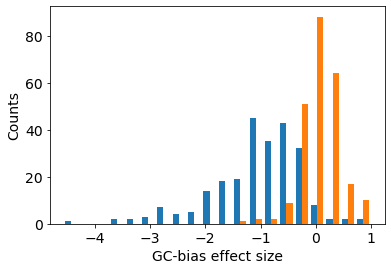

In [46]:
fig = plt.figure()
ax = plt.subplot(111)
plt.hist([right,left], bins=20)
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Counts', fontsize=14);
plt.setp(ax.get_xticklabels(),fontsize=14)
plt.xlabel('GC-bias effect size', fontsize=14);

outfile = os.path.join(plot_path, 'histogram_gcbias.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


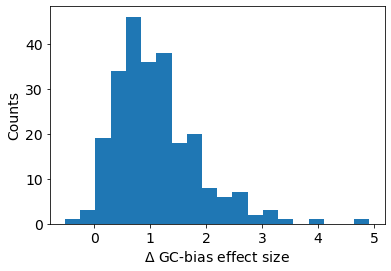

In [47]:
val = (scores[:,2] - scores[:,3])/scores[:,1]

fig = plt.figure()
ax = plt.subplot(111)
plt.hist(val, bins=20)
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Counts', fontsize=14);
plt.setp(ax.get_xticklabels(),fontsize=14)
plt.xlabel('$\Delta$ GC-bias effect size', fontsize=14);

outfile = os.path.join(plot_path, 'histogram_gcbias_diff.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

